## Propensity model to identify potential customers


Data Directory

In [1]:
#importing all the neccessory libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [2]:
#Loading the training data set
train = pd.read_excel('train.xlsx')

In [3]:
#checking the shape
train.shape

(8240, 24)

In [4]:
# Have a look at the data
train.head(30)

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,...,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded,profit,id
0,34.0,admin.,single,university.degree,no,no,yes,cellular,apr,wed,...,-1.8,93.075,-47.1,1.498,5099.1,999.0,0.0,no,NaN,1.0
1,31.0,services,single,high.school,no,no,no,cellular,jul,thu,...,1.4,93.918,-42.7,4.968,5228.1,999.0,0.0,no,NaN,2.0
2,NaN,admin.,single,high.school,no,no,no,telephone,jun,NaN,...,1.4,94.465,-41.8,4.961,5228.1,999.0,0.0,no,NaN,3.0
3,52.0,admin.,divorced,university.degree,unknown,yes,no,cellular,jul,tue,...,1.4,93.918,-42.7,4.962,5228.1,999.0,0.0,no,NaN,4.0
4,39.0,blue-collar,single,NaN,unknown,yes,no,cellular,jul,tue,...,1.4,93.918,-42.7,4.961,5228.1,999.0,0.0,no,NaN,5.0
5,40.0,entrepreneur,married,NaN,no,yes,no,telephone,jun,thu,...,1.4,94.465,-41.8,4.866,5228.1,999.0,0.0,no,NaN,6.0
6,50.0,technician,single,NaN,no,no,no,cellular,jul,tue,...,1.4,93.918,-42.7,4.961,5228.1,999.0,0.0,no,NaN,7.0
7,41.0,technician,married,professional.course,no,no,no,cellular,oct,thu,...,-3.4,92.431,-26.9,0.741,5017.5,999.0,0.0,no,NaN,8.0
8,23.0,blue-collar,single,basic.4y,no,yes,no,telephone,jun,fri,...,1.4,94.465,-41.8,4.959,5228.1,999.0,0.0,no,NaN,9.0
9,29.0,technician,married,professional.course,no,yes,no,cellular,aug,mon,...,1.4,93.444,-36.1,4.965,5228.1,999.0,0.0,no,NaN,10.0


In [5]:
# Datatypes of the columns
train.dtypes

custAge           float64
profession         object
marital            object
schooling          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
campaign          float64
pdays             float64
previous          float64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
pmonths           float64
pastEmail         float64
responded          object
profit            float64
id                float64
dtype: object

In [6]:
# checkout the duplicate rows
duplicate = train[train.duplicated()]
print("Duplicate Rows :") 
duplicate

Duplicate Rows :


,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,...,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded,profit,id


In [7]:
train.drop_duplicates(inplace=True)

<Axes: ylabel='responded'>

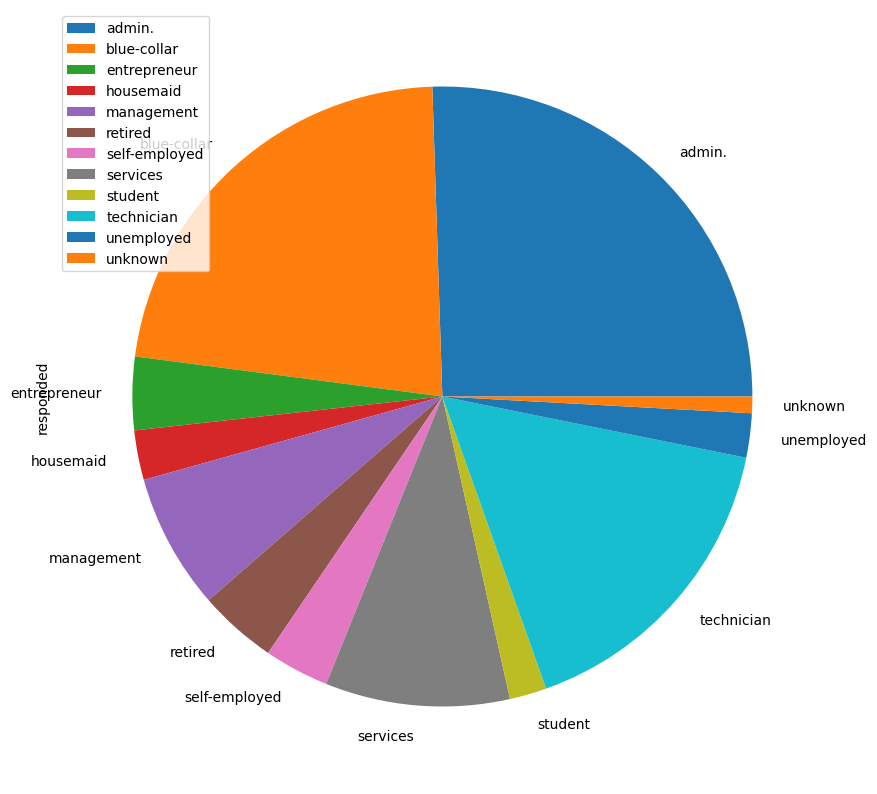

In [8]:
train.groupby(['profession']).count().plot(kind='pie', y='responded',figsize = (10,11))

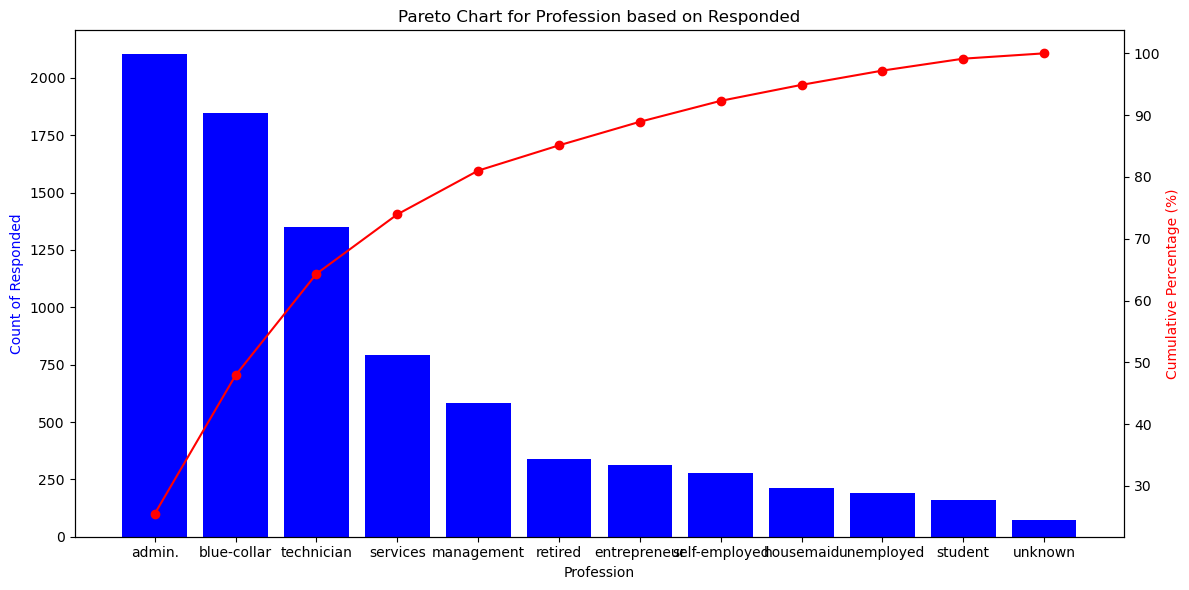

In [9]:
# Group by 'profession' and count 'responded'
profession_counts = train.groupby('profession')['responded'].count()

# Sort the counts in descending order
profession_counts = profession_counts.sort_values(ascending=False)

# Calculate cumulative percentage
cumulative_percentage = profession_counts.cumsum() / profession_counts.sum() * 100

# Plot the Pareto chart
fig, ax = plt.subplots(figsize=(12, 6))  # Set figure size for better readability

# Bar chart (counts of 'responded')
ax.bar(profession_counts.index, profession_counts, color='blue')

# Line chart (cumulative percentage)
ax2 = ax.twinx()
ax2.plot(profession_counts.index, cumulative_percentage, color='red', marker='o')

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Labeling
ax.set_xlabel('Profession')
ax.set_ylabel('Count of Responded', color='blue')
ax2.set_ylabel('Cumulative Percentage (%)', color='red')
plt.title('Pareto Chart for Profession based on Responded')

# Adjust the layout to prevent label cutoff
plt.tight_layout()

# Display the chart
plt.show()


As we can see, majority of our potential customer comes from admin,blue-collar, technician workgroup. followed by services abd Management  
these 6 groups contributes to more than 80% of the potental customer

C:\Users\91638\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1500x1500 with 0 Axes>

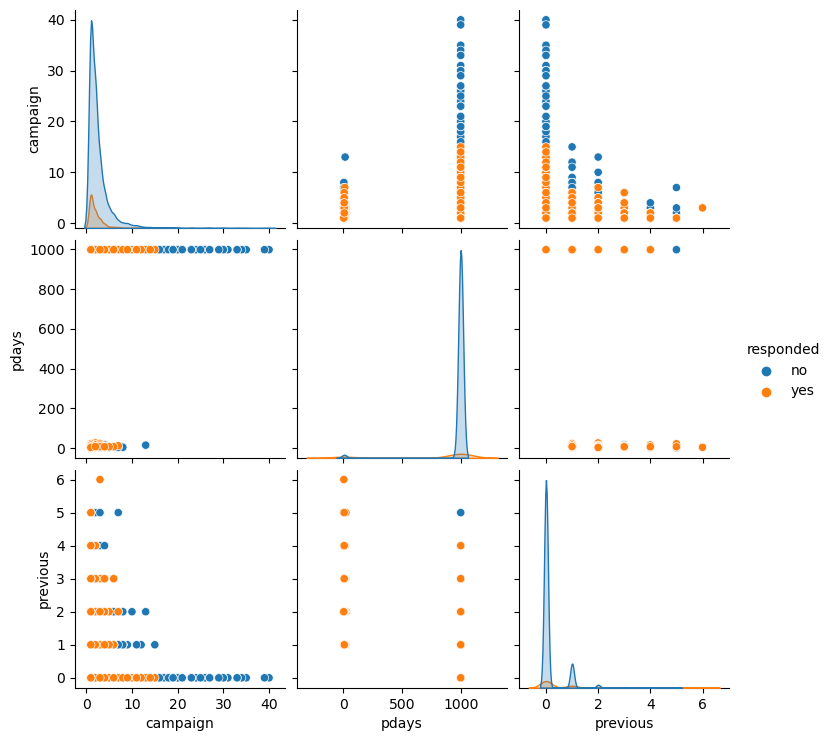

In [10]:
import seaborn as sns
plt.figure(figsize=(15,15))
sns.pairplot(train[['campaign','pdays','previous','responded']],hue='responded')
plt.show()

In [11]:
# Checking Null Values
train.isna().sum()/len(train)*100

custAge           24.466019
profession         0.024272
marital            0.024272
schooling         29.223301
default            0.024272
housing            0.024272
loan               0.024272
contact            0.024272
month              0.024272
day_of_week        9.575243
campaign           0.024272
pdays              0.024272
previous           0.024272
poutcome           0.024272
emp.var.rate       0.024272
cons.price.idx     0.024272
cons.conf.idx      0.024272
euribor3m          0.024272
nr.employed        0.024272
pmonths            0.024272
pastEmail          0.024272
responded          0.024272
profit            88.713592
id                 0.024272
dtype: float64

In [12]:
#lets find out the Average age of each proffession
mean_age_by_both = train.groupby(['profession','marital'])['custAge'].mean()
mean_age_by_both

# we can see the age group shows better variance when it is grouped on the
# basis of  profession and marital status

profession     marital 
admin.         divorced    43.558511
               married     40.558322
               single      32.895522
               unknown     29.000000
blue-collar    divorced    42.708333
               married     40.506890
               single      33.167857
               unknown     45.000000
entrepreneur   divorced    44.200000
               married     42.901099
               single      34.125000
housemaid      divorced    52.040000
               married     45.966667
               single      40.153846
               unknown     33.000000
management     divorced    47.731707
               married     43.591054
               single      33.222222
retired        divorced    63.500000
               married     63.098901
               single      56.388889
self-employed  divorced    43.428571
               married     43.562044
               single      32.366667
services       divorced    43.461538
               married     40.297143
              

In [13]:
# now lets fill the missing values of the custAge column with the mean

def fill_age(row):
    # Check if 'custAge' is missing
    if pd.isnull(row['custAge']):
        # Check if 'profession' or 'marital' is NaN
        if pd.isnull(row['profession']) or pd.isnull(row['marital']):
            return train['custAge'].mean()  # Fill with overall mean if either is NaN
        else:
            # Fill with the mean age for the corresponding profession + marital status
            return mean_age_by_both.get((row['profession'], row['marital']), train['custAge'].mean())  
    else:
        return row['custAge']  # If not missing, keep the original value

# Apply the function to fill missing 'custAge' values
train['custAge'] = train.apply(fill_age, axis=1)

In [14]:
# Check if there are any remaining missing values in the Age column
train['custAge'].isnull().sum()/len(train)*100


0.0

In [15]:
# Group by 'profession' and calculate the mode of 'schooling'
mode_schooling_by_profession = train.groupby('profession')['schooling'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

# Check the mode schooling for each profession (optional)
print(mode_schooling_by_profession)


profession
admin.             university.degree
blue-collar                 basic.9y
entrepreneur       university.degree
housemaid                   basic.4y
management         university.degree
retired                     basic.4y
self-employed      university.degree
services                 high.school
student                  high.school
technician       professional.course
unemployed               high.school
unknown                      unknown
Name: schooling, dtype: object


In [16]:
# Define a function to fill missing 'schooling' values using the group-specific mode
def fill_schooling(row):
    if pd.isnull(row['schooling']):  # Check if 'schooling' is missing
        # Fill with the mode schooling for the corresponding profession
        return mode_schooling_by_profession.get(row['profession'], train['schooling'].mode().iloc[0])  
    else:
        return row['schooling']  # If not missing, return the original value

# Apply the function to fill missing 'schooling' values
train['schooling'] = train.apply(fill_schooling, axis=1)


In [17]:
# Check for any remaining missing values in 'schooling'
print(train['schooling'].isnull().sum())

0


In [18]:
train.isna().sum()/len(train)*100

custAge            0.000000
profession         0.024272
marital            0.024272
schooling          0.000000
default            0.024272
housing            0.024272
loan               0.024272
contact            0.024272
month              0.024272
day_of_week        9.575243
campaign           0.024272
pdays              0.024272
previous           0.024272
poutcome           0.024272
emp.var.rate       0.024272
cons.price.idx     0.024272
cons.conf.idx      0.024272
euribor3m          0.024272
nr.employed        0.024272
pmonths            0.024272
pastEmail          0.024272
responded          0.024272
profit            88.713592
id                 0.024272
dtype: float64

In [19]:
# we can see that the column profit is having 88% missing values
# so lets drop that column
train.drop(columns=['profit'], inplace=True)

In [20]:
train.isna().sum()

custAge             0
profession          2
marital             2
schooling           0
default             2
housing             2
loan                2
contact             2
month               2
day_of_week       789
campaign            2
pdays               2
previous            2
poutcome            2
emp.var.rate        2
cons.price.idx      2
cons.conf.idx       2
euribor3m           2
nr.employed         2
pmonths             2
pastEmail           2
responded           2
id                  2
dtype: int64

In [21]:
# Check unique values and their frequency in 'day_of_week'
train.dropna(inplace=True)

In [22]:
train.isna().sum()

custAge           0
profession        0
marital           0
schooling         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
pmonths           0
pastEmail         0
responded         0
id                0
dtype: int64

In [23]:
len(train)

7451

# Exploratory data analysis


In [24]:
#Lets start with descriptive statistics
train.describe()

,custAge,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,id
count,7451.000000,7451.000000,7451.000000,7451.000000,7451.000000,7451.000000,7451.000000,7451.000000,7451.000000,7451.000000,7451.000000,7451.000000
mean,40.034952,2.542209,960.487183,0.186015,0.049886,93.567055,-40.572983,3.580949,5165.349805,960.259885,0.367199,4108.526372
std,9.769468,2.749337,191.737081,0.514251,1.566450,0.577189,4.659837,1.743512,72.684651,192.867165,1.281638,2376.241722
min,18.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000,0.000000,1.000000
25%,33.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000,999.000000,0.000000,2056.500000
50%,40.000000,2.000000,999.000000,0.000000,1.100000,93.444000,-41.800000,4.857000,5191.000000,999.000000,0.000000,4112.000000
75%,45.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,999.000000,0.000000,6156.500000
max,94.000000,40.000000,999.000000,5.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,999.000000,25.000000,8238.000000


<Axes: ylabel='responded'>

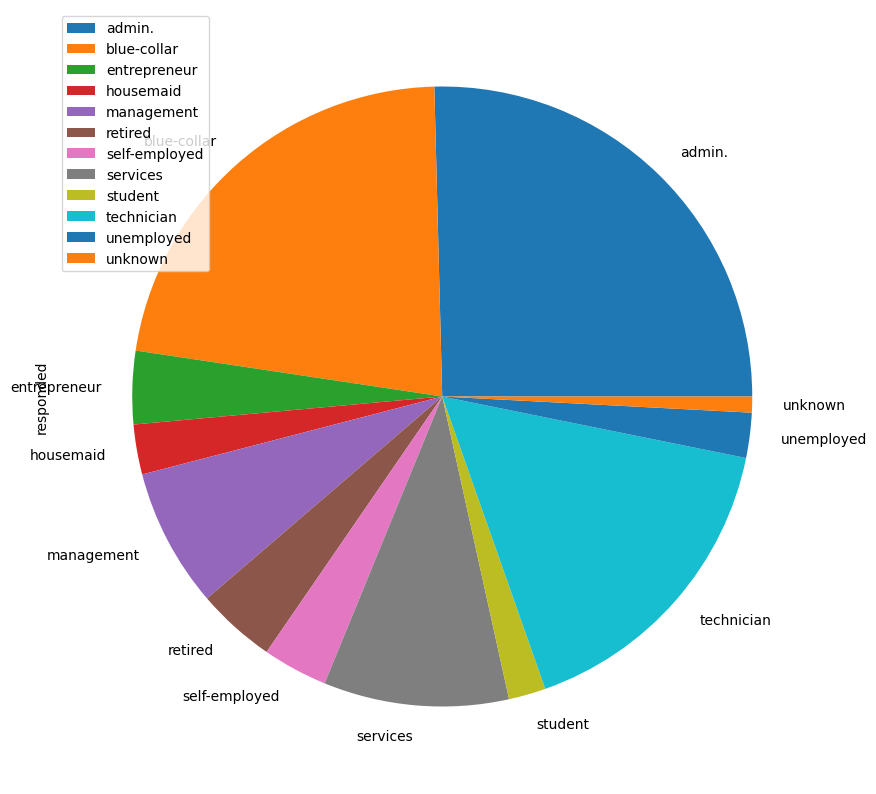

In [25]:
train.groupby(['profession']).count().plot(kind='pie', y='responded',figsize = (10,11))

In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7451 entries, 0 to 8237
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   custAge         7451 non-null   float64
 1   profession      7451 non-null   object 
 2   marital         7451 non-null   object 
 3   schooling       7451 non-null   object 
 4   default         7451 non-null   object 
 5   housing         7451 non-null   object 
 6   loan            7451 non-null   object 
 7   contact         7451 non-null   object 
 8   month           7451 non-null   object 
 9   day_of_week     7451 non-null   object 
 10  campaign        7451 non-null   float64
 11  pdays           7451 non-null   float64
 12  previous        7451 non-null   float64
 13  poutcome        7451 non-null   object 
 14  emp.var.rate    7451 non-null   float64
 15  cons.price.idx  7451 non-null   float64
 16  cons.conf.idx   7451 non-null   float64
 17  euribor3m       7451 non-null   float6

# Encoding and feature scaling

In [27]:
#seperating the numerical and categorical columns
from sklearn.preprocessing import StandardScaler
def data_type(train):
    numerical = []
    categorical = []
    for i in train.columns:
        if train[i].dtype == 'int64' or train[i].dtype=='float64':
            numerical.append(i)
        else:
            categorical.append(i)
    return numerical, categorical
numerical, categorical = data_type(train)

# Identifying the binary columns and ignoring them from scaling
def binary_columns(train):
    binary_cols = []
    for col in train.select_dtypes(include=['int', 'float']).columns:
        unique_values = train[col].unique()
        if np.in1d(unique_values, [0, 1]).all():
            binary_cols.append(col)
    return binary_cols

binary_cols = binary_columns(train)

In [28]:
# Remove the binary columns from the numerical columns
numerical = [i for i in numerical if i not in binary_cols]

def encoding(train, categorical):
    for i in categorical:
        train[i] = train[i].astype('category')
        train[i] = train[i].cat.codes
    return train

train = encoding(train, categorical)

In [29]:
def feature_scaling(train, numerical):
    sc_x = StandardScaler()
    train[numerical] = sc_x.fit_transform(train[numerical])
    return train

train = feature_scaling(train, numerical)

In [30]:
train.head(10)

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,...,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded,id
0,-0.617777,0,2,6,0,0,2,0,0,4,...,1,-1.181021,-0.852560,-1.400790,-1.194766,-0.911530,0.200878,-0.286527,0,-1.728697
1,-0.924877,7,2,3,0,0,0,0,3,2,...,1,0.861952,0.608065,-0.456488,0.795603,0.863379,0.200878,-0.286527,0,-1.728276
3,1.224821,0,0,6,1,2,0,0,3,3,...,1,0.861952,0.608065,-0.456488,0.792162,0.863379,0.200878,-0.286527,0,-1.727434
4,-0.105944,1,2,2,1,2,0,0,3,3,...,1,0.861952,0.608065,-0.456488,0.791588,0.863379,0.200878,-0.286527,0,-1.727014
5,-0.003578,2,1,6,0,2,0,1,4,2,...,1,0.861952,1.555826,-0.263335,0.737097,0.863379,0.200878,-0.286527,0,-1.726593
6,1.020088,9,2,5,0,0,0,0,3,3,...,1,0.861952,0.608065,-0.456488,0.791588,0.863379,0.200878,-0.286527,0,-1.726172
7,0.098789,9,1,5,0,0,0,0,8,2,...,1,-2.202508,-1.968388,2.934416,-1.628976,-2.034263,0.200878,-0.286527,0,-1.725751
8,-1.743810,1,2,0,0,2,0,1,4,0,...,1,0.861952,1.555826,-0.263335,0.790441,0.863379,0.200878,-0.286527,0,-1.725330
9,-1.129610,9,1,5,0,2,0,0,1,1,...,1,0.861952,-0.213212,0.959966,0.793882,0.863379,0.200878,-0.286527,0,-1.724909
11,-0.720144,1,1,7,0,0,0,0,3,1,...,1,0.861952,0.608065,-0.456488,0.791014,0.863379,0.200878,-0.286527,0,-1.724068


In [31]:
# now we can see that the 

In [32]:
X = train.drop(columns=['responded'])
y = train['responded']
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# logistic Regression Model

In [36]:
# 1. Logistic Regression
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(solver='liblinear', max_iter=200)
logmodel.fit(X_train, y_train)
log_pred = logmodel.predict(X_test)
log_acc = accuracy_score(y_test, log_pred)
log_cm = confusion_matrix(y_test, log_pred)
print(f'Logistic Regression Accuracy: {log_acc}')
print(f'Logistic Regression Confusion Matrix:\n{log_cm}')

Logistic Regression Accuracy: 0.98859825620389
Logistic Regression Confusion Matrix:
[[1316    9]
 [   8  158]]


In [37]:
# 2. Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred)
dt_cm = confusion_matrix(y_test, dt_pred)
print(f'Decision Tree Accuracy: {dt_acc}')
print(f'Decision Tree Confusion Matrix:\n{dt_cm}')

Decision Tree Accuracy: 1.0
Decision Tree Confusion Matrix:
[[1325    0]
 [   0  166]]


In [38]:

# 3. Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)
rf_cm = confusion_matrix(y_test, rf_pred)
print(f'Random Forest Accuracy: {rf_acc}')
print(f'Random Forest Confusion Matrix:\n{rf_cm}')

Random Forest Accuracy: 1.0
Random Forest Confusion Matrix:
[[1325    0]
 [   0  166]]


In [39]:
# 4. Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
gb_acc = accuracy_score(y_test, gb_pred)
gb_cm = confusion_matrix(y_test, gb_pred)
print(f'Gradient Boosting Accuracy: {gb_acc}')
print(f'Gradient Boosting Confusion Matrix:\n{gb_cm}')

Gradient Boosting Accuracy: 1.0
Gradient Boosting Confusion Matrix:
[[1325    0]
 [   0  166]]


In [41]:
# 5. Support Vector Machine (SVM)
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_acc = accuracy_score(y_test, svm_pred)
svm_cm = confusion_matrix(y_test, svm_pred)
print(f'SVM Accuracy: {svm_acc}')
print(f'SVM Confusion Matrix:\n{svm_cm}')

SVM Accuracy: 0.9590878604963112
SVM Confusion Matrix:
[[1308   17]
 [  44  122]]


In [43]:
# 6. Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)
nb_acc = accuracy_score(y_test, nb_pred)
nb_cm = confusion_matrix(y_test, nb_pred)
print(f'Naive Bayes Accuracy: {nb_acc}')
print(f'Naive Bayes Confusion Matrix:\n{nb_cm}')

Naive Bayes Accuracy: 0.95439302481556
Naive Bayes Confusion Matrix:
[[1307   18]
 [  50  116]]


The evaluation of various classification models revealed that tree-based methods, such as Decision Tree, Random Forest, and Gradient Boosting, achieved perfect accuracy (100%) on the test set, which may indicate overfitting. Logistic Regression also performed strongly with an accuracy of 98.86%, effectively identifying candidates to market. In contrast, Support Vector Machine and Naive Bayes classifiers had lower accuracies of 95.91% and 95.44%, respectively, demonstrating higher false negatives.

In [50]:
# Load the unseen data
unseen_data = pd.read_excel('test.xlsx')

In [56]:
print(unseen_data.isnull().sum())

custAge           8042
profession           0
marital              0
schooling            0
default              0
housing              0
loan                 0
contact              0
month                0
day_of_week          0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
pmonths              0
pastEmail            0
id                   0
dtype: int64


In [51]:
unseen_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   custAge         24908 non-null  float64
 1   profession      32950 non-null  object 
 2   marital         32950 non-null  object 
 3   schooling       23180 non-null  object 
 4   default         32950 non-null  object 
 5   housing         32950 non-null  object 
 6   loan            32950 non-null  object 
 7   contact         32950 non-null  object 
 8   month           32950 non-null  object 
 9   day_of_week     29622 non-null  object 
 10  campaign        32950 non-null  int64  
 11  pdays           32950 non-null  int64  
 12  previous        32950 non-null  int64  
 13  poutcome        32950 non-null  object 
 14  emp.var.rate    32950 non-null  float64
 15  cons.price.idx  32950 non-null  float64
 16  cons.conf.idx   32950 non-null  float64
 17  euribor3m       32950 non-null 

In [57]:
# Calculate mean age grouped by profession and marital status for unseen data
mean_age_by_both_unseen = unseen_data.groupby(['profession', 'marital'])['custAge'].mean()

# Function to fill missing 'custAge' values in unseen_data
def fill_age_unseen(row):
    # Check if 'custAge' is missing
    if pd.isnull(row['custAge']):
        # Check if 'profession' or 'marital' is NaN
        if pd.isnull(row['profession']) or pd.isnull(row['marital']):
            return train['custAge'].mean()  # Fill with overall mean if either is NaN
        else:
            # Fill with the mean age for the corresponding profession + marital status
            return mean_age_by_both_unseen.get((row['profession'], row['marital']), train['custAge'].mean())
    else:
        return row['custAge']  # If not missing, keep the original value

# Apply the function to fill missing 'custAge' values in unseen_data
unseen_data['custAge'] = unseen_data.apply(fill_age_unseen, axis=1)


In [58]:
# Function to separate numerical and categorical columns
def data_type(unseen_data):
    numerical = []
    categorical = []
    for column in unseen_data.columns:
        if unseen_data[column].dtype == 'int64' or unseen_data[column].dtype == 'float64':
            numerical.append(column)
        else:
            categorical.append(column)
    return numerical, categorical

# Identify binary columns
def binary_columns(unseen_data):
    binary_cols = []
    for column in unseen_data.select_dtypes(include=['int', 'float']).columns:
        unique_values = unseen_data[column].unique()
        if np.in1d(unique_values, [0, 1]).all():
            binary_cols.append(column)
    return binary_cols

# Get numerical and categorical columns
numerical_unseen, categorical_unseen = data_type(unseen_data)

# Identify binary columns and remove them from numerical columns
binary_cols_unseen = binary_columns(unseen_data)
numerical_unseen = [col for col in numerical_unseen if col not in binary_cols_unseen]

# Function to encode categorical variables
def encoding(unseen_data, categorical):
    for column in categorical:
        unseen_data[column] = unseen_data[column].astype('category')
        unseen_data[column] = unseen_data[column].cat.codes
    return unseen_data

# Encode categorical variables in the unseen data
unseen_data = encoding(unseen_data, categorical_unseen)

# Feature scaling for numerical columns
def feature_scaling(unseen_data, numerical):
    sc_x = StandardScaler()
    unseen_data[numerical] = sc_x.fit_transform(unseen_data[numerical])
    return unseen_data

# Scale numerical columns in the unseen data
unseen_data = feature_scaling(unseen_data, numerical_unseen)


In [59]:
import joblib

joblib.dump(rf_model, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [60]:
model = joblib.load('random_forest_model.pkl')  
# Make predictions
predictions = model.predict(unseen_data)

# Add predictions to the unseen data DataFrame
unseen_data['predicted_market'] = predictions

# Save the updated unseen data with predictions to the same file
unseen_data.to_excel('test_with_predictions.xlsx', index=False)